## 【問題1】線形回帰のクラスを作成する

In [1]:
class ScratchLinearRegression():
    """
    線形回帰のスクラッチ実装

    Parameters
    ----------
    
    num_iter : int
    lr : float
    no_bias : bool
    verbose :bool
    学習過程を出力する場合はTrue
     Attributes
    ----------
    self.coef : theta 次の形のndarray, shape (n_features,)
      parameter
    self.loss : 次の形のndarray, shape (self.iter,)
      学習用データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証用データに対する損失の記録

    
    """
    
    def __init__(self, num_iter, lr, bias, verbose=False, random_state=False):
         # ハイパーパラメータを属性として記録
            self.num_iter = num_iter
            self.lr = lr
            self.bias = bias
            self.verbose = verbose
            self.random_state = random_state
            self.loss = np.zeros(self.num_iter)
            self.val_loss = np.zeros(self.num_iter)
            
            
    def _linear_hyposis(self,X):
        
        """線形の仮定関数を計算する
        Parameters
        ----------
        self.X : 次の形のndarray, shape (n_samples, n_features)
        学習データ fitから持ってくる
        Returns
        -------
        次の形のndarray, shape (n_samples, 1)
        線形の仮定関数による推定結果
        """
        y_pred = np.dot(X, self.coef_)
        
        return y_pred
    
    def MSE(self, y_pred, y):
        """
        平均二乗誤差の計算
        Parameters
        ----------
        y_pred : 次の形のndarray, shape (n_samples,)
        推定した値
        y : 次の形のndarray, shape (n_samples,)
        正解値
        Returns
        ----------
        mse : numpy.float
        平均二乗誤差
        """
        ids = len(y)
        # Σ(y_pred - y_true)^2 / 2*m　平均二乗誤差を計算
        mse = np.sum((y_pred - y)**2)/(2*ids)
        
        return mse
    
    def _compute_cost(self, X, y):
        """
        平均二乗誤差を計算する。MSEは共通の関数を作っておき呼び出す
        
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
        学習データ
        y : 次の形のndarray, shape (n_samples, 1)
        正解値
        Returns
        -------
        次の形のndarray, shape (1,)
        平均二乗誤差
        """
        y_pred = np.dot(X, self.coef_)
        mse = self.MSE(y_pred, y)
        
        return mse
        
    def _gradient_descent(self, X, y):
        """
        説明を記述
        """
        # gradient と mseを算出
        y_pred = self._linear_hyposis(X)
        mse = self.MSE(y_pred, y)
        ids = len(y)
        # MSEの微分が勾配 1/mΣ(ypred - ytrue)X
        grad = np.dot(y_pred - y, X) / ids
        
        # 更新 -lr(/ids) * grad
        lr = self.lr
        self.coef_ = self.coef_ - lr * grad
        
        return mse
    
    def fit(self,X, y, X_val=None, y_val=None):
        """
        線形回帰を学習する。検証用データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """
        # biasがTrueならX0として要素が1の 次の形のndarray, shape (n_features,)
        if self.bias:
            b = np.ones(X.shape[0])
            # biasをinsertしたXを上書きしインスタンス変数にして格納
            X = np.insert(X, 0, b, axis=1)
        
        # Xの形に合わせてself.coef_ をインスタンス変数に
        # random_state=Trueでseed固定
        if self.random_state:
            rand_seed = 0
            np.random.seed(rand_seed)
        self.coef_ = np.random.randn(X.shape[1])
        # bias = Trueならval_dataにbiasを追加する 
        if (X_val is not None) and (y_val is not None):
            if self.bias:
                b = np.ones(X_val.shape[0])
                X_val = np.insert(X_val, 0, b, axis=1)
            
        # lossの格納とthetaのnum_iter回の更新
        for i in range(self.num_iter):
            mse = self._gradient_descent(X, y)
            self.loss[i] = mse
            
            if self.verbose:
                print('{}回目mse {}'.format(i+1, mse))
            
            # val_lossの格納
            if (X_val is not None) and (y_val is not None):
                y_val_pred = np.dot(X_val, self.coef_)
                #print('y_val_pred {}, y_val {}'.format(y_val_pred, y_val))
                val_mse = self.MSE(y_val_pred, y_val)
                self.val_loss[i] = val_mse
                
                if self.verbose:
                    print('{}回目val_loss {}'.format(i+1, val_mse))
                
    def predict(self, X_test):
        # 学習と異なるXで予測
        if self.bias:
            b = np.ones(X_test.shape[0])
            X_test = np.insert(X_test, 0, b, axis=1)
        
        # y_predを算出
        y_pred = np.dot(X_test, self.coef_)
        
        return y_pred


In [2]:
# import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline


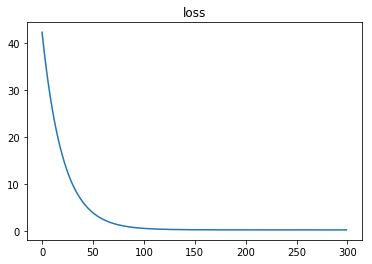

In [3]:
# 動作の確認
X = np.array([[1,2],[2,4],[3,6]])
y = np.array([4,7,10])
reg = ScratchLinearRegression(num_iter=300, lr=0.001, bias=True, verbose=None, random_state=False)
reg.fit(X,y)
#reg.predict(X_test)
plt.title('loss')
plt.plot(reg.loss)
plt.show()

In [4]:
reg.predict(X)
# 正解ラベルは[4,7,10]

array([ 3.07720203,  6.77171924, 10.46623644])

In [5]:
# House_Priceデータで確認する
# session4のtrainfaile読み込み
df = pd.read_csv("C:/Users/umini/git-test/diveintocode-ml/week4/train.csv")
# GrLivArea', 'YearBuilt','SalePriceを抜き出す
df_grlivearea_yearbuilt = df[['GrLivArea', 'YearBuilt','SalePrice']]
X = df_grlivearea_yearbuilt.iloc[:,:-1].values
y = df_grlivearea_yearbuilt.iloc[:,-1].values

In [6]:
# 標準化
scaler = StandardScaler()
scaler.fit(X)
X_stand = scaler.transform(X)
print(X_stand)

# 対数化(正規分布に近づける)
log_y = np.log(y)
print(log_y)

[[ 0.37033344  1.05099379]
 [-0.48251191  0.15673371]
 [ 0.51501256  0.9847523 ]
 ...
 [ 1.56964722 -1.00249232]
 [-0.83278768 -0.70440562]
 [-0.49393395 -0.20759447]]
[12.24769432 12.10901093 12.31716669 ... 12.49312952 11.86446223
 11.90158345]


C:\Users\umini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\umini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [7]:
# tarinデータをtrainとvalに分ける
X_train, X_val, y_train, y_val = train_test_split(
     X_stand, log_y, test_size=0.2, random_state=42)

## 【問題2】学習曲線のプロット

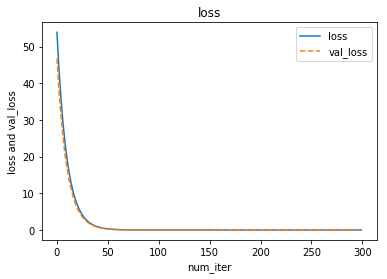

In [8]:
# ScratchLinearRegression()クラスを使用する(デバック)
# 使用データはHousePriceで標準化と対数化を行ったもの
num_iter = 300
lr = 0.05
reg = ScratchLinearRegression(num_iter, lr,bias=True, verbose=False, random_state=False)
reg.fit(X_train, y_train, X_val, y_val)
#reg.predict(X_val)
plt.title('loss')
plt.plot(reg.loss, label='loss')
plt.plot(reg.val_loss, '--', label='val_loss')
plt.xlabel('num_iter')
plt.ylabel('loss and val_loss')
plt.legend()
plt.show()

## 【問題7】スクラッチで学べることは何か
数式をコードに置換するパターンを認識できる.

i.e.数式上で同じΣという記号でもコードが変わる例

MSE : Σ((E)^2)/ 2m は
np.sum(np.square(E))(**2も同じ)

gradient : Σ(E)X は

np.dot(E,X) (sumでなく行列の積)

where, E= y_pred-y_ture

このようなパターンは理解とともに自然に慣れる必要があると感じた
そのためコードを書くときは必ず数式と見比べながら書くようにする.
パターンを増やせば新しい論文の数式を実装するときに役立つと思う


## 【問題3】（アドバンス課題）バイアス項の除去

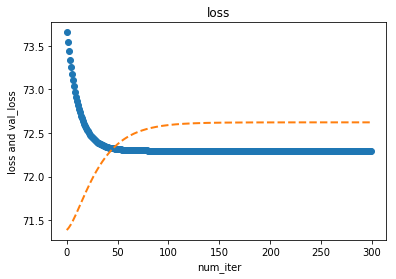

In [9]:
# bias=Falseにする
num_iter = 300
lr = 0.05
reg = ScratchLinearRegression(num_iter, lr,bias=False, verbose=False, random_state=False)
reg.fit(X_train, y_train, X_val, y_val)
#reg.predict(X_val)
plt.title('loss')
plt.plot(reg.loss, 'o',label='loss')
plt.plot(reg.val_loss, '--', linewidth=2, label='val_loss')
plt.xlabel('num_iter')
plt.ylabel('loss and val_loss')
plt.show()

bias項を入れない場合収束が早いがbias項を付けた場合に比べてlossが下がらなかった.

## 【問題4】（アドバンス課題）特徴量の多次元化

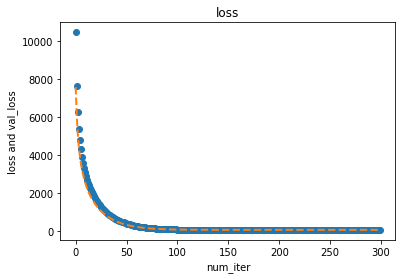

In [10]:
# 特徴量を2乗する
X_train_2 = X_train**2
X_val_2 = X_val**2
y_train_2 = y_train**2
y_val_2 = y_val**2
# 比較する
num_iter = 300
lr = 0.05
reg = ScratchLinearRegression(num_iter, lr,bias=True, verbose=False, random_state=False)
reg.fit(X_train_2, y_train_2, X_val_2, y_val_2)
#reg.predict(X_test)
plt.title('loss')
plt.plot(reg.loss, 'o',label='loss')
plt.plot(reg.val_loss, '--', linewidth=2, label='val_loss')
plt.xlabel('num_iter')
plt.ylabel('loss and val_loss')
plt.show()

In [11]:
# 特徴量を3乗する
X_train_3 = X_train**3
X_val_3 = X_val**3
y_train_3 = y_train**3
y_val_3 = y_val**3

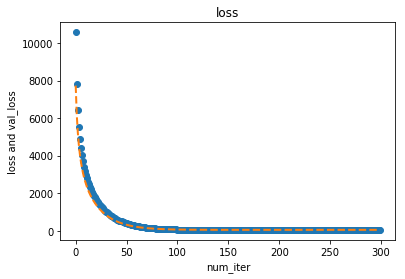

In [12]:
# 特徴量を3乗する
X_train_3 = X_train**3
X_val_3 = X_val**3
y_train_3 = y_train**3
y_val_3 = y_val**3
# 違いを比較する
num_iter = 300
lr = 0.05
reg = ScratchLinearRegression(num_iter, lr,bias=True)
reg.fit(X_train_2, y_train_2, X_val_2, y_val_2)
#reg.predict(X_test)
plt.title('loss')
plt.plot(reg.loss, 'o',label='loss')
plt.plot(reg.val_loss, '--', linewidth=2, label='val_loss')
plt.xlabel('num_iter')
plt.ylabel('loss and val_loss')
plt.show()

特徴量を2乗すると元の特徴量の時と比較したときにグラフの形状が定性的に変化するようには感じないが
同じiter回数ではlossが上昇した。2乗と3乗ではほとんど変化しなかった.

## 【問題5】（アドバンス課題）更新式の導出
$$
\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m}[(h_\theta(x^{(i)} - y^{(i)} )x_{j}^{(i)}]
$$

更新式は -lr*grad
gradientはMSEの微分でできる

hθ = Xθとする

MSE = 1/2m * Σ((hθ(X) - y)^2)

MSE = 1/2m * Σ(x^2θ^2 - 2Xθy + y^2)

∂MSE/∂θ = 1/2m (2X^2θ +2xy)

∂MSE/∂θ = 1/m(Xθ - y )X

∂MSE/∂θ = 1/m(hθ - y)X

ここで更新式はθ =θ -lr* ∂MSE/∂θ

よってθ = θ -lr* 1/m(hθ - y)X

## 【問題6】（アドバンス課題）局所最適解の問題
MSEはθに対して(xθ-b)の2乗の形式になっており下に凸の関数である。
下に凸の二次関数は変数が-∞<θ<∞の範囲において勾配0となるθにおいて最小値になることが知られている.
よって最小値以外の極値にはまる可能性がなく勾配0の点を目指していくと必ず最小値に収束する

## pyfileにして呼び出す

1328019889.1486485


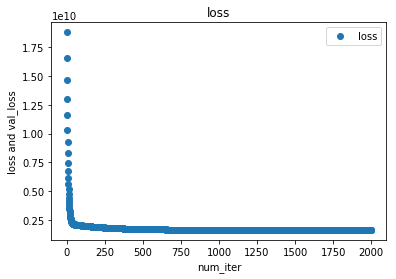

<Figure size 432x288 with 0 Axes>

In [13]:
#py fileの呼び出し 
%run ../ml-scratch/utils/scratch_linear_regression.py --file_path  "C:/Users/umini/git-test/diveintocode-ml/ml-scratch/utils/df_grlivearea_yearbuilt.csv" --num_iter 2000 --lr 1.0e-08 --random_state True

In [14]:
# scikitlearnと比較してみる
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr = LinearRegression()
df = pd.read_csv("C:/Users/umini/git-test/diveintocode-ml/ml-scratch/utils/df_grlivearea_yearbuilt.csv")
X = df.iloc[:,:-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mse

2039370183.5444863

# # 学習率に対する考察
今回HousePriceのデータを使用した際に標準化＆対数化をした場合に学習が進んだ(学習率0.01)が、しない場合に
MSE(loss関数)が発散してしまった.これは同じデータでも標準化＆対数化をした場合としない場合で
データの値が大きく異なり、学習率が同じでも更新量が大きく異なっているために起こっていることであった
今回標準化＆対数化しない場合には学習率を1e-08(最初は信じられない数字だと思った)とかなり小さくしたこと
で収束した

結論　値が大きいデータはその分学習率を小さくする

ps.scikitlearnとの比較

scratchのMSE  1460456830.5740407

sklearanのMSE 1437536654.0529032